# Represented population groups

This analysis aimed to answer the following research question: **Which African ethnolinguistic population groups are represented by the genetic data and what are the proportions of samples from Central, Southern, Eastern and Western Africa?**. A sample is defined as an individual from which genetic data was obtained.

To achieve this, the following steps were performed: 

1. Data Preparation: Population data for the samples was compiled and prepared for analysis according to the `Notebooks/Data preparation/1-Sample_populations.ipynb` Jupyter notebook. This Jupyter notebook also contains more information on the data. The compiled data is stored in `Data\Processed\Sample_populations.csv`.
2. Analysis and Visualisation: 
    * To gain an understanding of the different African ethnolinguistic populations represented by the genetic data, the data was grouped according to ethnolinguistic classification. A bar plot was then generated to visualise the sample counts for each population group.
    * Furthermore, to depict the distribution of samples across Central, Southern, Eastern, and Western African regions, the data was data was further grouped by region and used to construct a pie chart visually depicting the proportion of samples from each geographic region.

## Imports

Notebook setup

In [1]:
import os
import sys

from dotenv import load_dotenv

load_dotenv()

PROJECT_ROOT = os.getenv("PROJECT_ROOT")
if PROJECT_ROOT not in sys.path:
    os.chdir(PROJECT_ROOT + "/Notebooks")
    sys.path.append(PROJECT_ROOT)

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import Utils.constants as constants
import Utils.functions as functions

Import sample population data

In [2]:
sample_subpopulations = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Data",
        "Processed",
        "Sample_populations.csv",
    )
)

sample_subpopulations.head(5)

,SUB,SAMPLE_NAME,REG
0,Mandinka,HG02461,WA
1,Mandinka,HG02462,WA
2,Mandinka,HG02463,WA
3,Mandinka,HG02464,WA
4,Mandinka,HG02465,WA


## Data analysis and visualisation

### Data exploration
Are there any missing values?

In [3]:
sample_subpopulations.isnull().any()

SUB            False
SAMPLE_NAME    False
REG             True
dtype: bool

What are the number of samples?

In [4]:
sample_subpopulations["SAMPLE_NAME"].count()

804

Which subpopulation groups are present? 

In [5]:
sample_subpopulations["SUB"].unique()

array(['Mandinka', 'Esan', 'Mende', 'Mbuti Pygmy', 'Biaka Pygmy',
       'Mandenka', 'Yoruba', 'San', 'Bantu South Africa', 'Bantu Kenya',
       'Luhya'], dtype=object)

### Group data
Group data by sample ethnolinguistic classification (subpopulation) group

In [6]:
# Group data by sample subpopulation

grouped_sample_subpopulations = (
    functions.group_and_count(sample_subpopulations, ["SUB"])
    .reset_index()
    .rename(columns={"SAMPLE_NAME": "SAMPLE_COUNT"})
    .drop(columns="REG")
)

# Add regional information

grouped_sample_subpopulations["REG"] = grouped_sample_subpopulations["SUB"].map(
    constants.REGIONAL_CLASSIFICATION
)

Group data by regional classification

In [7]:
grouped_regions = (
    grouped_sample_subpopulations.groupby("REG").sum(numeric_only=True).reset_index()
)
grouped_regions

,REG,SAMPLE_COUNT
0,CA,40
1,EA,109
2,SA,14
3,WA,641


### Data visualisation

Set plot parameters

In [8]:
sns.set(rc={"figure.figsize": (10, 8)}) # Set plot figure size

plt.rc("font", size=constants.MEDIUM_FONT)  # controls default text sizes
plt.rc("axes", titlesize=constants.MEDIUM_FONT)  # fontsize of the axes title
plt.rc("axes", labelsize=constants.BIGGER_FONT)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=constants.MEDIUM_FONT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=constants.MEDIUM_FONT)  # fontsize of the tick labels
plt.rc("legend", fontsize=constants.MEDIUM_FONT)  # legend fontsize
plt.rc("figure", titlesize=constants.BIGGER_FONT)  # fontsize of the figure title

Construct a horizontal barplot of sample counts per subpopulation, colour coded by regional classification

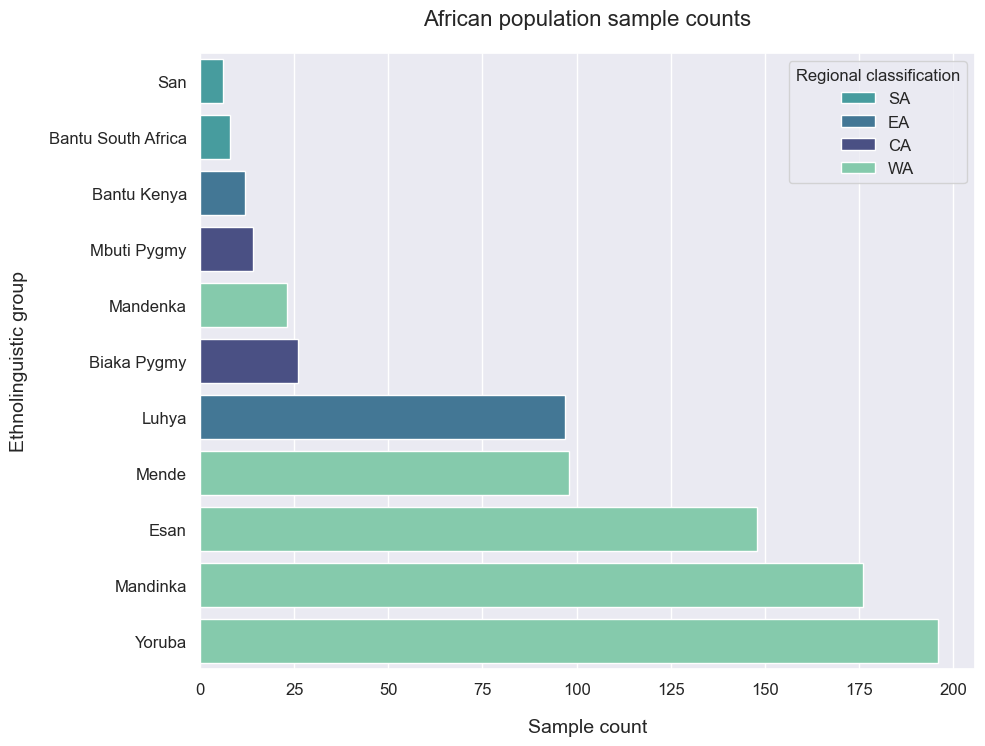

In [9]:
# Define a custom colour palette for plot
color_dict = dict({"SA": "#38AAAC", "EA": "#357BA3", "CA": "#40498E", "WA": "#79D6AE"})
values = grouped_sample_subpopulations.REG.values

# Construct barplot
variant_barplot = functions.create_plot(
    plot_type="barplot",
    x="SAMPLE_COUNT",
    y="SUB",
    palette=color_dict,
    data=grouped_sample_subpopulations.sort_values("SAMPLE_COUNT"),
    hue="REG",
    order=grouped_sample_subpopulations.sort_values("SAMPLE_COUNT").SUB,
    dodge=False,
)

plt.xlabel(xlabel="Sample count", labelpad=15)
plt.ylabel(ylabel="Ethnolinguistic group", labelpad=15)
plt.legend(title="Regional classification", loc="upper right")
plt.title("African population sample counts", size=constants.LARGEST_FONT, pad=20)

plt.savefig(
    "..\Results\Figures\Sample_population_counts.png", dpi=1200, bbox_inches="tight"
)
plt.show()

From the plot above we can see that the individuals from which genomic data was gathered were representative of 11 ethnolinguistic sub-population groups from Western Africa (WA), Southern Africa (SA), Eastern Africa (EA), and Central Africa (CA). The most genomic samples were taken from Yoruban and Gambian (GWD) sub-population groups.

Visualise the regional distribution of samples using a pie chart.

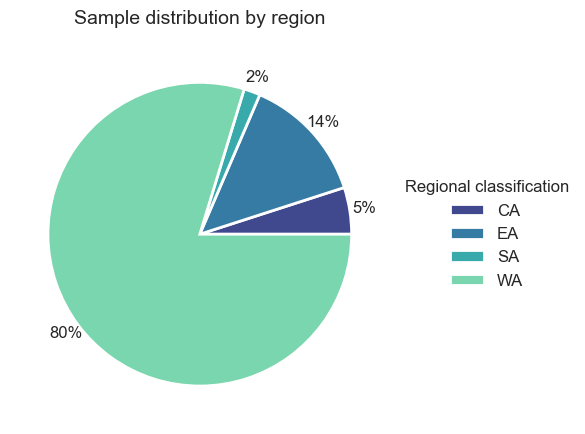

In [10]:
# Create pie chart of sample count per region
color_dict = dict({"SA": "#38AAAC", "EA": "#357BA3", "CA": "#40498E", "WA": "#79D6AE"})

values = grouped_regions.REG.values

fig, ax = plt.subplots(figsize=(6, 6))
patches, texts, pcts = plt.pie(
    data=grouped_regions,
    x="SAMPLE_COUNT",
    colors=[color_dict[key] for key in values],
    autopct="%.0f%%",
    wedgeprops={"linewidth": 2.0, "edgecolor": "white"},
    pctdistance=1.1,
    labeldistance=1.2,
)

ax.legend(
    patches,
    values,
    title="Regional classification",
    fontsize=12,
    frameon=False,
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
)

plt.title("Sample distribution by region", size=constants.BIGGER_FONT, pad=15)
plt.tight_layout()
plt.savefig(
    "..\Results\Figures\Sample_region_proportions.png", dpi=1200, bbox_inches="tight"
)
plt.show()

From the plot above, we can see that Southern Africa (SA) was under-represented in the African genomic data. The majority of the individuals from which genomic data was gathered were from Western Africa (WA).